# Drug Prescription


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#downloading_data">Downloading the Data</a></li>
        <li><a href="#pre-processing">Pre-processing</a></li>
        <li><a href="#setting_up_tree">Setting up the Decision Tree</a></li>
        <li><a href="#modeling">Modeling</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#visualization">Visualization</a></li>
    </ol>
</div>
<br>
<hr>


#### Importing necessary Libraries 

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

#### Loading Dataset 

In [2]:
my_data=pd.read_csv("Datasets/Drug_prescription_Dataset.csv", delimiter=",")

#### Viewing First 5 rows of dataframe

In [3]:
my_data[0:5]

,disease,age,gender,severity,drug
0,diarrhea,4,male,LOW,"Oral rehydration salts, Probiotics"
1,diarrhea,4,male,NORMAL,"Loperamide, Azithromycin"
2,diarrhea,5,male,LOW,"Oral rehydration salts, Probiotics"
3,diarrhea,5,male,NORMAL,"Loperamide, Azithromycin"
4,diarrhea,6,male,LOW,"Oral rehydration salts, Probiotics"


#### Checking the shape of dataset

In [4]:
my_data.shape

(1288, 5)

<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>


#### Checking for Duplicate values

In [5]:
duplicate = my_data.duplicated()
 
print("Duplicate Rows :")
 
# Displaying the resultant Dataframe
duplicate

Duplicate Rows :


0       False
1       False
2       False
3       False
4       False
        ...  
1283    False
1284    False
1285    False
1286    False
1287    False
Length: 1288, dtype: bool

#### Checking the total count of Duplicate Values

In [6]:
# Checking the total count of Duplicate Values
duplicate_rows = my_data[my_data.duplicated()]
print("Duplicate Values :", len(duplicate_rows))

Duplicate Values : 0


#### Removing duplicate values 

In [7]:
duplicate_vals = my_data.drop_duplicates()
duplicate_vals

,disease,age,gender,severity,drug
0,diarrhea,4,male,LOW,"Oral rehydration salts, Probiotics"
1,diarrhea,4,male,NORMAL,"Loperamide, Azithromycin"
2,diarrhea,5,male,LOW,"Oral rehydration salts, Probiotics"
3,diarrhea,5,male,NORMAL,"Loperamide, Azithromycin"
4,diarrhea,6,male,LOW,"Oral rehydration salts, Probiotics"
...,...,...,...,...,...
1283,diarrhea,60,male,NORMAL,"Loperamide, Fluoroquinolone"
1284,diarrhea,60,male,LOW,"Bismuth subsalicylate, Dietary adjustments"
1285,diarrhea,60,female,HIGH,"Loperamide, Fluoroquinolone"
1286,diarrhea,60,female,NORMAL,"Loperamide, Fluoroquinolone"


#### Checking the dataset shape after removing duplicates

In [8]:
my_data.shape

(1288, 5)

#### Removing the column containing the target name since it doesn't contain numeric values.


In [9]:
X = my_data[["disease","age","gender","severity"]].values
X[0:5]

array([['diarrhea', 4, 'male', 'LOW'],
       ['diarrhea', 4, 'male', 'NORMAL'],
       ['diarrhea', 5, 'male', 'LOW'],
       ['diarrhea', 5, 'male', 'NORMAL'],
       ['diarrhea', 6, 'male', 'LOW']], dtype=object)

#### Checking for Null Values

In [10]:
my_data.isnull().sum()

disease     0
age         0
gender      0
severity    0
drug        0
dtype: int64

#### Another method for checking Null Values 

In [11]:
my_data.isnull().values.any()

False

#### Filling the target variable(Class).


In [12]:
y = my_data["drug"]
y[0:10]

0    Oral rehydration salts, Probiotics
1              Loperamide, Azithromycin
2    Oral rehydration salts, Probiotics
3              Loperamide, Azithromycin
4    Oral rehydration salts, Probiotics
5              Loperamide, Azithromycin
6    Oral rehydration salts, Probiotics
7              Loperamide, Azithromycin
8    Oral rehydration salts, Probiotics
9              Loperamide, Azithromycin
Name: drug, dtype: object

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>

#### Setting a random seed for reproducibility

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
import numpy as np
# set random seed for reproducibility
np.random.seed(42)

# load your data
X = my_data[["disease","age","gender","severity"]].values # your feature data
y = my_data["drug"].values # your target data

#### Converting categorical variable into dummy/indicator variables. (Preprocessing)


In [15]:
from sklearn import preprocessing
le_disease = preprocessing.LabelEncoder()
le_disease.fit([  'diarrhea','gastritis','arthritis','migraine'])
X[:,0] = le_disease.transform(X[:,0])

le_gender = preprocessing.LabelEncoder()
le_gender.fit(['female','male'])
X[:,2] = le_gender.transform(X[:,2]) 

  # le_age = preprocessing.LabelEncoder()
  # le_age.fit([   '4',  '5',  '6',  '7',  '8',  '9', '10', '11', '12', '13', '14', '15', '16', '17' ,'18', '19', '20', '21', '22', '23', '24', '25', '26', '27',
  # '28', '29', '30', '31'])
  # X[:,1] = le_age.transform(X[:,1])

le_severity = preprocessing.LabelEncoder()
le_severity.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,3] = le_severity.transform(X[:,3])




X[0:5]

array([[1, 4, 1, 1],
       [1, 4, 1, 2],
       [1, 5, 1, 1],
       [1, 5, 1, 2],
       [1, 6, 1, 1]], dtype=object)

#### Cross Validating

In [16]:
import warnings

# Ignoring User Warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [17]:
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [18]:
from sklearn.model_selection import cross_val_score

for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    scores = cross_val_score(model, X, y, cv=10)
    mean_score = scores.mean()
    print("max_depth = ", max_depth, ":", "mean accuracy = ", mean_score*100 )

max_depth =  1 : mean accuracy =  29.969718992248062
max_depth =  2 : mean accuracy =  45.18653100775194
max_depth =  3 : mean accuracy =  68.63493217054264
max_depth =  4 : mean accuracy =  77.95542635658916
max_depth =  5 : mean accuracy =  86.96160368217053
max_depth =  6 : mean accuracy =  95.1937984496124
max_depth =  7 : mean accuracy =  95.1937984496124
max_depth =  8 : mean accuracy =  95.1937984496124
max_depth =  9 : mean accuracy =  95.1937984496124
max_depth =  10 : mean accuracy =  95.1937984496124


#### Split train and test data

In [19]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=1)

#### Saving the train data as a CSV file

In [20]:
# Save the train data as a CSV file
train_data = pd.DataFrame(X_trainset)
train_data['target'] = y_trainset
train_data.to_csv("Datasets/train_data.csv", index=False)

#### Saving test Data as CSV file

In [21]:
# Save the test data as a CSV file
test_data = pd.DataFrame(X_testset)
test_data['target'] = y_testset
test_data.to_csv('Datasets/test_data.csv', index=False)

#### Printing the shape of X_trainset and y_trainset. Ensure that the dimensions match


In [22]:
print(X_trainset.shape)
print(y_trainset.shape)

(901, 4)
(901,)


#### Print the shape of X_testset and y_testset. Ensure that the dimensions match


In [23]:
print(X_testset.shape)
print(y_testset.shape)


(387, 4)
(387,)


#### Checking for any null values in both test and train dataset after spliting   

In [24]:
test_data.isnull().values.any()

False

In [25]:
train_data.isnull().values.any()

False

<hr>

<div id="modeling">
    <h2>Modeling</h2>
</div>


In [26]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=7)

fitting the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>


In [27]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Making some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>


In [28]:
predTree = drugTree.predict(X_testset)

In [29]:
train = drugTree.predict(X_trainset)

Displaying out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.


In [30]:
print (predTree [0:20])
print (y_testset [0:20])


['PPIs, H. pylori treatment' 'NSAIDs, Caffeine combinations'
 'Loperamide, Fluoroquinolone' 'Biologicals, Corticosteroids'
 'NSAIDs, Caffeine combinations' 'Oral rehydration salts, Probiotics'
 'Loperamide, Fluoroquinolone' 'Antacids, Sucralfate'
 'NSAIDs, Topical treatments' 'Biologicals, Corticosteroids'
 'Triptans, Beta-blockers/Anticonvulsants' 'NSAIDs, Topical treatments'
 'Bismuth subsalicylate, Dietary adjustments' 'NSAIDs, Topical treatments'
 'NSAIDs, Topical treatments' 'Loperamide, Fluoroquinolone'
 'Triptans, Beta-blockers/Anticonvulsants' 'PPIs, H. pylori treatment'
 'Biologicals, Steroids' 'Bismuth subsalicylate, Dietary adjustments']
['PPIs, H. pylori treatment' 'NSAIDs, Caffeine combinations'
 'Loperamide, Fluoroquinolone' 'Biologicals, Corticosteroids'
 'NSAIDs, Caffeine combinations' 'Oral rehydration salts, Probiotics'
 'Loperamide, Fluoroquinolone' 'Antacids, Sucralfate'
 'NSAIDs, Topical treatments' 'Biologicals, Corticosteroids'
 'Triptans, Beta-blockers/Anticonvu

<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    
    
</div>

#### Testing Accuracy

In [31]:
from sklearn import metrics
import matplotlib.pyplot as plt
predictions_test =  metrics.accuracy_score(y_testset, predTree)
print("DecisionTrees's Testing Accuracy: ",predictions_test)

DecisionTrees's Testing Accuracy:  1.0


#### Calculating the accuracy score without sklearn


In [32]:
correct_labels=(predTree==y_testset).sum()
total_labels=y_testset.shape[0]
print("Testing Accuracy:",(correct_labels/total_labels))

Testing Accuracy: 1.0


#### Training Accuracy of the model

In [33]:
from sklearn.metrics import accuracy_score
predictions_train = drugTree.predict(X_trainset)
Train_acc = accuracy_score(y_trainset,predictions_train)
print("DecisionTrees's Training Accuracy: ",Train_acc)

DecisionTrees's Training Accuracy:  1.0


<hr>

<div id="visualization">
    <h2>Visualization</h2>
    Visualizing the tree
</div>


In [34]:
from six import StringIO
import pydotplus
import graphviz
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [35]:
# dot_data = StringIO()
# filename = "drugTree.png"
# featureNames = my_data.columns[0:4]
# targetNames = my_data["drug"].unique().tolist()
# out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# #graph.write_png(filename)
# img = mpimg.imread(filename)
# plt.figure(figsize=(100, 200))
# plt.imshow(img,interpolation='nearest')

# Evaluating on test dataset

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(y_testset, predTree, zero_division = 1))
# Generating the confusion matrix for evaluating the testing corpus
conf_matrix = confusion_matrix(y_testset, predTree)
print("Confusion Matrix:")
print(conf_matrix)

                                            precision    recall  f1-score   support

          Acetaminophen, Lifestyle changes       1.00      1.00      1.00         1
                 Antacids, Dietary changes       1.00      1.00      1.00         1
                      Antacids, Sucralfate       1.00      1.00      1.00        20
              Biologicals, Corticosteroids       1.00      1.00      1.00        63
                     Biologicals, Steroids       1.00      1.00      1.00         6
Bismuth subsalicylate, Dietary adjustments       1.00      1.00      1.00        39
                   H2 blockers, Probiotics       1.00      1.00      1.00         4
                  Loperamide, Azithromycin       1.00      1.00      1.00         7
               Loperamide, Fluoroquinolone       1.00      1.00      1.00        55
             NSAIDs, Caffeine combinations       1.00      1.00      1.00        23
                NSAIDs, Topical treatments       1.00      1.00      1.00  

# Evaluating on Training dataset

In [38]:
print(classification_report(y_trainset,predictions_train, zero_division = 1))
# Generating the confusion matrix for evaluating the training corpus
from sklearn.metrics import confusion_matrix
 
predictions_train = drugTree.predict(X_trainset)
confusion_matrix_train = confusion_matrix(y_trainset, predictions_train)
print("Confusion matrix (training):\n", confusion_matrix_train)

                                            precision    recall  f1-score   support

          Acetaminophen, Lifestyle changes       1.00      1.00      1.00         7
                 Antacids, Dietary changes       1.00      1.00      1.00         7
                      Antacids, Sucralfate       1.00      1.00      1.00        78
              Biologicals, Corticosteroids       1.00      1.00      1.00       133
                     Biologicals, Steroids       1.00      1.00      1.00        10
Bismuth subsalicylate, Dietary adjustments       1.00      1.00      1.00        59
                   H2 blockers, Probiotics       1.00      1.00      1.00        12
                  Loperamide, Azithromycin       1.00      1.00      1.00        17
               Loperamide, Fluoroquinolone       1.00      1.00      1.00       141
             NSAIDs, Caffeine combinations       1.00      1.00      1.00        75
                NSAIDs, Topical treatments       1.00      1.00      1.00  

### Visualizing Confusion Matrix

In [39]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
conf_matrix = confusion_matrix(y_testset, predTree )
print(conf_matrix)

[[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 63  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 55  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 31  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 56  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 67]]


Train score 1.0
Test score 1.0


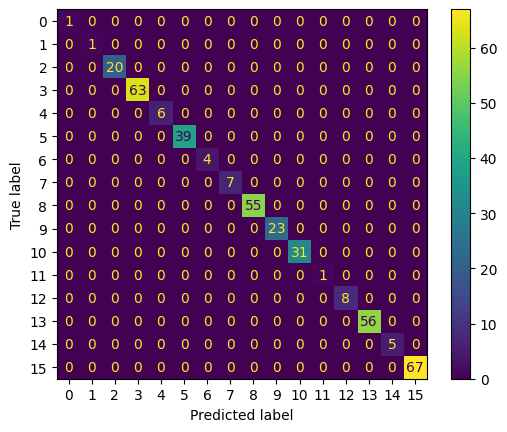

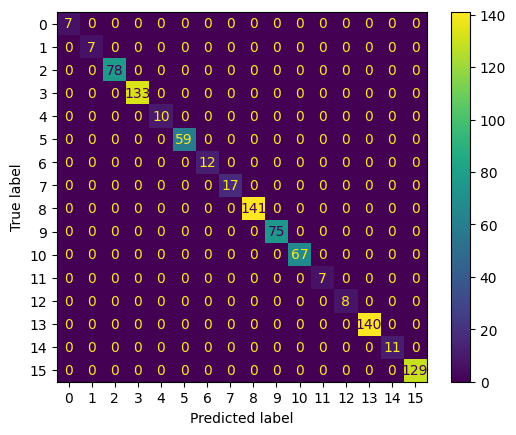

In [41]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
print(f'Train score {accuracy_score(train,y_trainset)}')
print(f'Test score {accuracy_score(predTree,y_testset)}')
conf_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
conf_train = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_train)
conf_test.plot()
conf_train.plot()

#### Saving as a pickle file

In [42]:
import pickle 
pickle.dump(drugTree,open("drugTree.pkl","wb"))

In [43]:
model = pickle.load(open("drugTree.pkl","rb"))
model.predict(X_testset)

array(['PPIs, H. pylori treatment', 'NSAIDs, Caffeine combinations',
       'Loperamide, Fluoroquinolone', 'Biologicals, Corticosteroids',
       'NSAIDs, Caffeine combinations',
       'Oral rehydration salts, Probiotics',
       'Loperamide, Fluoroquinolone', 'Antacids, Sucralfate',
       'NSAIDs, Topical treatments', 'Biologicals, Corticosteroids',
       'Triptans, Beta-blockers/Anticonvulsants',
       'NSAIDs, Topical treatments',
       'Bismuth subsalicylate, Dietary adjustments',
       'NSAIDs, Topical treatments', 'NSAIDs, Topical treatments',
       'Loperamide, Fluoroquinolone',
       'Triptans, Beta-blockers/Anticonvulsants',
       'PPIs, H. pylori treatment', 'Biologicals, Steroids',
       'Bismuth subsalicylate, Dietary adjustments',
       'Loperamide, Fluoroquinolone', 'NSAIDs, Caffeine combinations',
       'Triptans, Beta-blockers/Anticonvulsants',
       'NSAIDs, Topical treatments', 'Loperamide, Fluoroquinolone',
       'Triptans, Beta-blockers/Anticonvulsants

In [44]:
print(model.predict([[1, 19, 1, 0]]))

['Loperamide, Fluoroquinolone']
